# توجه 

1. به راهنمایی هایی که در کد آمده است توجه کنید
2. مواردی که به صورت "#TODO"
را باید بصورتی که در صورت پروژه تعریف شده است انجام دهید. 

In [ ]:
! pip install hazm
! pip install gensim==4.1.2
!pip install words
!pip install elasticsearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import json
from tqdm import tqdm
from gensim.models import Word2Vec
import numpy as np
import random
import pandas as pd
# import whatever you need for your implementation  

# step 1 
داده هایی که در اختیار دارید را بارگذاری کنید و مشابه بخش های قبل پیش پردازش های لازم را انجام دهید. 
مطابق فازهای و بخش های پیشین پروژه مراحل پیش پردازش را انجام دهید. در نهایت لیست از اسناد بسازید که برای هر متن شامل توکن های آن متن باشد. 
این لیست میتواند ساختاری مطابق تصویر زیر داشته باشد.
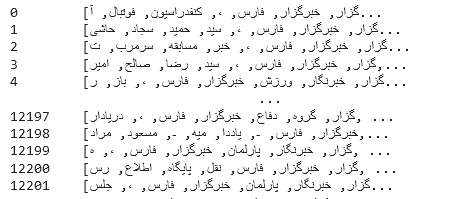

# گام دوم 
در این گام شما باید بتوانید که هر سند را به یک بردار عددی تبدیل کنید. این کار را به کمک ماژول آماده ایی که در اختیار شما قرار گرفته است انجام می شود.
بدین منظور مراحل زیر را انجام دهید. 










دو بلوک بعدی کد برای استفاده از ماژول آماده تهیه شده و صرفا به شکل مثال نوشته شده اند، ممکن است برای استفاده عملی در پروژه نیاز به تغییر باشد. 

In [ ]:
from  embedding import * 
# dataset: each document is a list of its tokens. 
# model_path: is a path that you want save model in it. 
doc2vec = DocToVec (dataset:List[List] , vec_size = 200 , model_path = 'word2vec.model'))



تولید بردارهای تمام اسناد و ذخیره در یک لیست بمنظور استفاده در گام های بعدی 

In [ ]:
%%time
doc_vectors = []
for i in tqdm(range(len(docs_list))):
  doc_vectors.append(doc2vec.embed(dataset[i])) 

# ابتدا بردارهای عددی داده های تست را بدست آورده و سپس از این بردارها برای تولید بردار  بقیه ی داده ها استفاده کنید. 

In [ ]:
mapping = { 
    "mappings": {
        "properties": {
          "content": {
            "type": "text"
          },
            "category":{
                "type": "keyword"
            },
            "vec":{
                "type": "dense_vector",
                "dims": 200,
                "index": True,
                "similarity": "cosine"
            }
        }
    }
}

In [ ]:
es = Elasticsearch("http://localhost:9200")

In [ ]:
index_name = 'ir_knn'

In [ ]:
# Delete index if one does exist
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

# Create index
es.indices.create(index=index_name, body=mapping)

In [ ]:
with open("IR01_3_test_4k.json" , 'r') as f:
    data = json.load(f)

In [ ]:
from copy import deepcopy
data_tmp = []
for i in tqdm(range(len(data))):
    tmp_doc = data[f'{i}']
    doc = dict()
    # filter_doc: method for preprocessing a doc. 
    doc['content'] = " ".join(filter_doc(tmp_doc['content']))
    doc['vec'] = list(doc_vectors[i])
    doc['category'] = tmp_doc['category']
    data_tmp.append(doc)


In [ ]:
data_bulk = [
    {
        "_index" : index_name,
        "_id" : i + 1,
        "_source": data_tmp[i]
    }
    for i in range(len(data_tmp))
]
resp = helpers.bulk(
  es,
  data_bulk,
  index = index_name
)
print(resp)

# گام سوم

در این بخش باید داده های تست را بارگذاری و پیش پردازش کنید و سپس برای هر متن بردار آن را بدست آورده و به روش  نزدیکترین همسایه جستجو را انجام داده و برچسب این سند را بدست آورید. 

In [ ]:
test_dataset = pd.read_excel("IR01_3_46k.json")

In [ ]:
res = []
for i in tqdm(range(len(test_dataset))):
    vec = doc_to_vec(test_dataset.content[i])    
    try:
        resp = es.knn_search(index=index_name,knn={
          #  TODO
          }
          ,source=['content','category'],)
      #  predict label for doc
      # TODO
    except:
        # usualy happens when all the elements of 
        # the vector are zero.
        pass

# گام چهارم 

حال که برای هر متن برچسب آن را بدست آورده اید. متون هر دسته را به نحوی از سایر دسته ها مجزا کنید و مطابق موارد خواسته شده در گزارش جستجو را در دسته های مختلف انجام دهید. 